# Analysing Nifty50 and Bank nifty stocks using pandas 

Finding the concepts and technicalities of stock market very interesting, I am choosing a dataset accordingly wherein an attempt to perform some basic data analysis of Nifty50 and Bank nifty using various features which I learnt throughout this course will be done. 

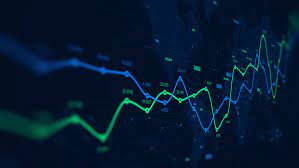



# ---------------------------------------------------------------------------------------------------------------

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


# ---------------------------------------------------------------------------------------------------------------

## Downloading the Dataset

I found this dataset from kaggle.com where thousands of interesting datasets are available. I installed opendatasets before doing so as it allowed me to download the dataset directly on my Jupyter notebook.

In [2]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
dataset_url = 'https://www.kaggle.com/ramamet4/nse-stocks-database' 

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sourabhpatil2711
Your Kaggle Key: ········


 62%|██████▏   | 5.00M/8.11M [00:00<00:00, 27.9MB/s]

100%|██████████| 8.11M/8.11M [00:00<00:00, 36.2MB/s]


The dataset has been downloaded and extracted.

In [5]:
data_dir = './nse-stocks-database'

In [6]:
import os
os.listdir(data_dir)

['nifty50.csv', 'banknifty.csv']

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "Analysing stocks in NSE stock exchange" 

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [10]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "f20201673/analysing-stocks-in-nse-stock-exchange" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/f20201673/analysing-stocks-in-nse-stock-exchange


'https://jovian.ai/f20201673/analysing-stocks-in-nse-stock-exchange'

# ---------------------------------------------------------------------------------------------------------------

## Data Preparation and Cleaning

Let's load the dataset using pandas to explore different things about this particular dataset. 
Initially lets see some features of these datasets like datatypes involved, memory used, rows and columns present, mean of the respective columns (opening, higs, lows, closings), std. deviation, etc. and also lets add some relevant columns to get more insights. In order to get a breif overview of these both datasets, lets merge them and check out the result.



In [11]:
import pandas as pd

In [12]:
nifty50_dir = pd.read_csv(data_dir + "/nifty50.csv")

In [13]:
banknifty_dir = pd.read_csv(data_dir + "/banknifty.csv")

In [14]:
nifty50_dir

,index,date,time,open,high,low,close
0,NIFTY,20130401,09:16,5701.15,5704.65,5694.30,5697.00
1,NIFTY,20130401,09:17,5697.05,5698.35,5695.65,5697.50
2,NIFTY,20130401,09:18,5697.90,5697.90,5690.60,5692.15
3,NIFTY,20130401,09:19,5691.65,5694.70,5691.65,5693.90
4,NIFTY,20130401,09:20,5694.40,5695.05,5693.35,5694.55
...,...,...,...,...,...,...,...
352915,NIFTY,20160930,15:26,8618.00,8619.85,8617.65,8618.50
352916,NIFTY,20160930,15:27,8618.45,8618.95,8617.25,8617.25
352917,NIFTY,20160930,15:28,8617.20,8618.65,8616.85,8617.50
352918,NIFTY,20160930,15:29,8617.40,8618.80,8615.60,8616.65


In [15]:
banknifty_dir

,index,date,time,open,high,low,close
0,BANKNIFTY,20121203,09:16,12125.70,12161.70,12125.70,12160.95
1,BANKNIFTY,20121203,09:17,12161.75,12164.80,12130.40,12130.40
2,BANKNIFTY,20121203,09:18,12126.85,12156.10,12126.85,12156.10
3,BANKNIFTY,20121203,09:19,12157.25,12164.75,12151.60,12164.20
4,BANKNIFTY,20121203,09:20,12162.80,12162.80,12148.20,12151.15
...,...,...,...,...,...,...,...
367570,BANKNIFTY,20160930,15:26,19321.00,19322.80,19314.25,19318.35
367571,BANKNIFTY,20160930,15:27,19318.80,19322.20,19312.30,19317.40
367572,BANKNIFTY,20160930,15:28,19317.55,19323.40,19314.45,19315.95
367573,BANKNIFTY,20160930,15:29,19315.80,19324.20,19312.00,19314.10


In [16]:
nifty50_dir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352920 entries, 0 to 352919
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   index   352920 non-null  object 
 1   date    352920 non-null  int64  
 2   time    352920 non-null  object 
 3   open    352920 non-null  float64
 4   high    352920 non-null  float64
 5   low     352920 non-null  float64
 6   close   352920 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 18.8+ MB


In [17]:
banknifty_dir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367575 entries, 0 to 367574
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   index   367575 non-null  object 
 1   date    367575 non-null  int64  
 2   time    367575 non-null  object 
 3   open    367575 non-null  float64
 4   high    367575 non-null  float64
 5   low     367575 non-null  float64
 6   close   367575 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 19.6+ MB


In [18]:
nifty50_dir.describe()

,date,open,high,low,close
count,3.529200e+05,352920.000000,352920.000000,352920.000000,352920.000000
mean,2.014495e+07,7374.515649,7376.077510,7372.936147,7374.498883
std,1.094640e+04,1070.893139,1071.032665,1070.756739,1070.885970
min,2.013010e+07,5126.150000,5127.250000,5118.850000,5126.300000
25%,2.013121e+07,6167.650000,6168.900000,6166.550000,6167.700000
50%,2.014120e+07,7738.800000,7740.150000,7737.450000,7738.800000
75%,2.015112e+07,8298.762500,8300.900000,8297.050000,8298.750000
max,2.016093e+07,9115.400000,9119.200000,9105.650000,9106.500000


In [19]:
banknifty_dir.describe()

,date,open,high,low,close
count,3.675750e+05,367575.000000,367575.000000,367575.000000,367575.000000
mean,2.014401e+07,15078.023296,15082.498465,15073.480983,15077.993028
std,1.169302e+04,3184.438089,3185.213591,3183.628315,3184.411825
min,2.012110e+07,1405.050000,1407.050000,1404.600000,1405.200000
25%,2.013103e+07,12092.200000,12095.000000,12089.150000,12092.175000
50%,2.014110e+07,15526.100000,15531.200000,15521.400000,15525.950000
75%,2.015103e+07,17956.050000,17960.550000,17951.100000,17955.800000
max,2.016093e+07,20903.950000,20907.550000,20899.250000,20907.550000


In [20]:
nifty50_dir['range'] = nifty50_dir.high - nifty50_dir.low

In [21]:
banknifty_dir['range'] = banknifty_dir.high - banknifty_dir.low

In [22]:
nifty50_dir

,index,date,time,open,high,low,close,range
0,NIFTY,20130401,09:16,5701.15,5704.65,5694.30,5697.00,10.35
1,NIFTY,20130401,09:17,5697.05,5698.35,5695.65,5697.50,2.70
2,NIFTY,20130401,09:18,5697.90,5697.90,5690.60,5692.15,7.30
3,NIFTY,20130401,09:19,5691.65,5694.70,5691.65,5693.90,3.05
4,NIFTY,20130401,09:20,5694.40,5695.05,5693.35,5694.55,1.70
...,...,...,...,...,...,...,...,...
352915,NIFTY,20160930,15:26,8618.00,8619.85,8617.65,8618.50,2.20
352916,NIFTY,20160930,15:27,8618.45,8618.95,8617.25,8617.25,1.70
352917,NIFTY,20160930,15:28,8617.20,8618.65,8616.85,8617.50,1.80
352918,NIFTY,20160930,15:29,8617.40,8618.80,8615.60,8616.65,3.20


In [23]:
banknifty_dir

,index,date,time,open,high,low,close,range
0,BANKNIFTY,20121203,09:16,12125.70,12161.70,12125.70,12160.95,36.00
1,BANKNIFTY,20121203,09:17,12161.75,12164.80,12130.40,12130.40,34.40
2,BANKNIFTY,20121203,09:18,12126.85,12156.10,12126.85,12156.10,29.25
3,BANKNIFTY,20121203,09:19,12157.25,12164.75,12151.60,12164.20,13.15
4,BANKNIFTY,20121203,09:20,12162.80,12162.80,12148.20,12151.15,14.60
...,...,...,...,...,...,...,...,...
367570,BANKNIFTY,20160930,15:26,19321.00,19322.80,19314.25,19318.35,8.55
367571,BANKNIFTY,20160930,15:27,19318.80,19322.20,19312.30,19317.40,9.90
367572,BANKNIFTY,20160930,15:28,19317.55,19323.40,19314.45,19315.95,8.95
367573,BANKNIFTY,20160930,15:29,19315.80,19324.20,19312.00,19314.10,12.20


In [24]:
merged_df = nifty50_dir.merge(banknifty_dir, on="close")

In [25]:
merged_df

,index_x,date_x,time_x,open_x,high_x,low_x,close,range_x,index_y,date_y,time_y,open_y,high_y,low_y,range_y
0,NIFTY,20141201,09:17,8610.00,8615.75,8608.75,8615.75,7.00,BANKNIFTY,20130828,11:13,8587.65,8615.75,8587.65,28.10
1,NIFTY,20150407,11:18,8619.85,8622.05,8614.65,8615.75,7.40,BANKNIFTY,20130828,11:13,8587.65,8615.75,8587.65,28.10
2,NIFTY,20150211,14:04,8616.85,8618.25,8615.30,8615.75,2.95,BANKNIFTY,20130828,11:13,8587.65,8615.75,8587.65,28.10
3,NIFTY,20150212,12:32,8614.15,8616.00,8614.15,8615.75,1.85,BANKNIFTY,20130828,11:13,8587.65,8615.75,8587.65,28.10
4,NIFTY,20150717,15:28,8616.10,8616.70,8613.55,8615.75,3.15,BANKNIFTY,20130828,11:13,8587.65,8615.75,8587.65,28.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7285,NIFTY,20160923,10:57,8858.90,8859.55,8858.35,8859.35,1.20,BANKNIFTY,20130904,11:04,8863.05,8865.10,8859.35,5.75
7286,NIFTY,20160923,10:57,8858.90,8859.55,8858.35,8859.35,1.20,BANKNIFTY,20130904,11:30,8862.65,8867.75,8858.95,8.80
7287,NIFTY,20160923,11:59,8867.20,8868.45,8867.20,8867.90,1.25,BANKNIFTY,20130829,13:20,8853.85,8867.90,8853.85,14.05
7288,NIFTY,20160923,15:12,8828.55,8829.25,8827.25,8829.25,2.00,BANKNIFTY,20130828,14:57,8806.10,8829.25,8806.10,23.15


In [26]:
import jovian

In [27]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "f20201673/analysing-stocks-in-nse-stock-exchange" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/f20201673/analysing-stocks-in-nse-stock-exchange


'https://jovian.ai/f20201673/analysing-stocks-in-nse-stock-exchange'

# ---------------------------------------------------------------------------------------------------------------

## Exploratory Analysis and Visualization

Now lets have some visuals which will provide better insights to our existing data. i have imported seaborn and matplotlib for this purpose.



> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

In [28]:
nifty50_dir_lite = nifty50_dir.head(150)

In [29]:
banknifty_dir_lite = banknifty_dir.head(150)

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [30]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Lets have some brief overview of statistics like mean, standard deviation, max, min, etc. in these datasets.

In [31]:
merged_df.describe()

,date_x,open_x,high_x,low_x,close,range_x,date_y,open_y,high_y,low_y,range_y
count,7.290000e+03,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7.290000e+03,7290.000000,7290.000000,7290.000000,7290.000000
mean,2.015441e+07,8744.382565,8746.150898,8742.559499,8744.298121,3.591399,2.013086e+07,8744.562263,8750.206008,8738.805754,11.400254
std,5.596766e+03,133.338175,133.432107,133.165285,133.223649,2.713188,3.627835e+01,133.453307,132.739404,133.701288,7.765256
min,2.014111e+07,8384.500000,8386.150000,8381.350000,8383.300000,0.600000,2.013082e+07,8384.300000,8401.450000,8366.750000,1.250000
25%,2.015022e+07,8637.100000,8639.050000,8635.550000,8637.600000,2.000000,2.013083e+07,8636.400000,8641.500000,8633.450000,6.400000
50%,2.015042e+07,8768.075000,8770.625000,8766.200000,8768.275000,2.900000,2.013083e+07,8770.500000,8776.200000,8763.550000,9.700000
75%,2.016082e+07,8851.937500,8853.100000,8850.550000,8851.950000,4.350000,2.013090e+07,8852.750000,8857.837500,8847.250000,14.300000
max,2.016093e+07,9115.400000,9119.200000,9105.650000,9106.500000,55.200000,2.013090e+07,9104.850000,9108.100000,9104.850000,83.500000


#### Lets see the overall relationship of opening and closing values of these stocks in this particular dataset.

<AxesSubplot:title={'center':'BankNifty Open Vs Close'}, xlabel='open', ylabel='close'>

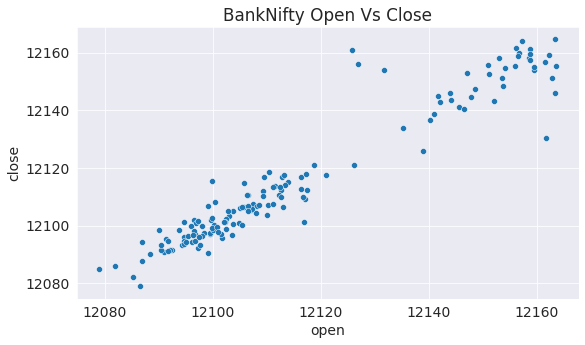

In [32]:
plt.title("BankNifty Open Vs Close")
sns.scatterplot(x = banknifty_dir_lite.open, y = banknifty_dir_lite.close)

<AxesSubplot:title={'center':'Nifty50 Open Vs Close'}, xlabel='open', ylabel='close'>

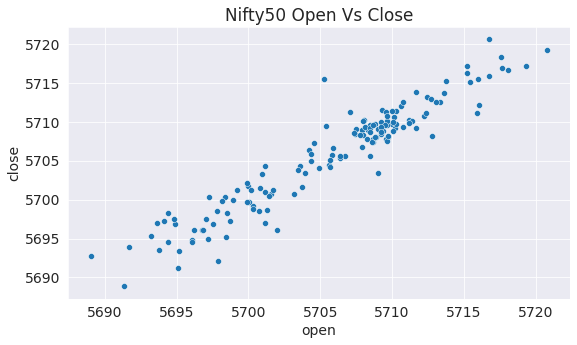

In [33]:
plt.title("Nifty50 Open Vs Close")
sns.scatterplot(x = nifty50_dir_lite.open, y = nifty50_dir_lite.close)

### We observe that in case of BankNifty, the values ranging from 12090-12120 have the highest entries for openings and closings. Similarly for Nifty50, the range is 5705-5715

# ---------------------------------------------------------------------------------------------------------------

#### Now let's try to compare the time and closing value for nifty50 in the following plot

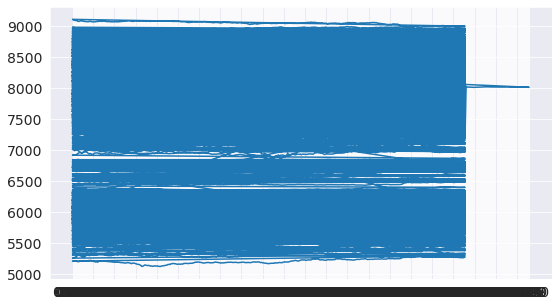

In [34]:
plt.plot( nifty50_dir.time, nifty50_dir.close)

## As you may see, due to large amount of values, the graph doesnt convey anything properly. The same will happen in the case of banknifty. Hence I will trim my dataset, keeping the market values only until 11:45 am

In [35]:
nifty50_dir_lite = nifty50_dir.head(150)

In [36]:
banknifty_dir_lite = banknifty_dir.head(150)

In [37]:
nifty50_dir_lite

,index,date,time,open,high,low,close,range
0,NIFTY,20130401,09:16,5701.15,5704.65,5694.30,5697.00,10.35
1,NIFTY,20130401,09:17,5697.05,5698.35,5695.65,5697.50,2.70
2,NIFTY,20130401,09:18,5697.90,5697.90,5690.60,5692.15,7.30
3,NIFTY,20130401,09:19,5691.65,5694.70,5691.65,5693.90,3.05
4,NIFTY,20130401,09:20,5694.40,5695.05,5693.35,5694.55,1.70
...,...,...,...,...,...,...,...,...
145,NIFTY,20130401,11:41,5700.35,5700.50,5698.80,5698.85,1.70
146,NIFTY,20130401,11:42,5698.70,5698.75,5697.10,5697.25,1.65
147,NIFTY,20130401,11:43,5697.50,5697.65,5696.85,5696.85,0.80
148,NIFTY,20130401,11:44,5696.80,5696.90,5695.95,5696.15,0.95


In [38]:
banknifty_dir_lite

,index,date,time,open,high,low,close,range
0,BANKNIFTY,20121203,09:16,12125.70,12161.70,12125.70,12160.95,36.00
1,BANKNIFTY,20121203,09:17,12161.75,12164.80,12130.40,12130.40,34.40
2,BANKNIFTY,20121203,09:18,12126.85,12156.10,12126.85,12156.10,29.25
3,BANKNIFTY,20121203,09:19,12157.25,12164.75,12151.60,12164.20,13.15
4,BANKNIFTY,20121203,09:20,12162.80,12162.80,12148.20,12151.15,14.60
...,...,...,...,...,...,...,...,...
145,BANKNIFTY,20121203,11:41,12100.80,12102.95,12099.55,12099.55,3.40
146,BANKNIFTY,20121203,11:42,12100.95,12101.85,12097.70,12097.70,4.15
147,BANKNIFTY,20121203,11:43,12097.45,12098.20,12096.10,12096.15,2.10
148,BANKNIFTY,20121203,11:44,12096.50,12098.30,12096.50,12098.30,1.80


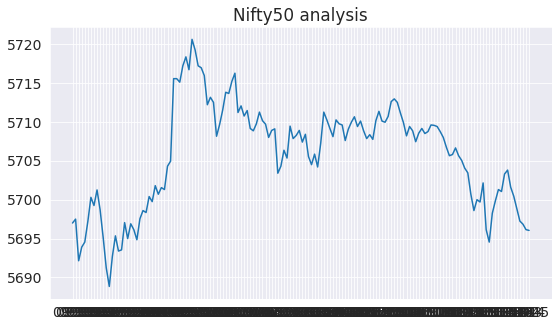

In [39]:
plt.title('Nifty50 analysis')
plt.plot( nifty50_dir_lite.time,  nifty50_dir_lite.close)

## This particular plot seems more decent and one can now see the market movements precisely and make inferences like at 11:45, market was in a downtrend.


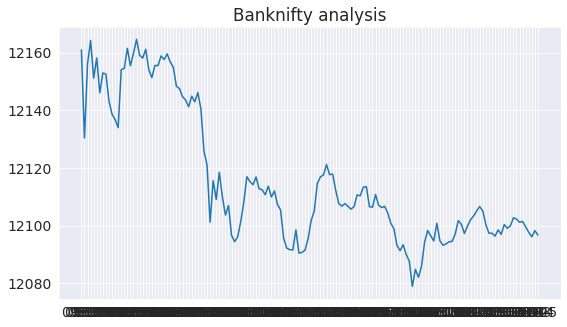

In [40]:
plt.title('Banknifty analysis')
plt.plot( banknifty_dir_lite.time,  banknifty_dir_lite.close)

### Similarly, for banknifty, one can infer that market opened at a very high circuit but until 11:45 am it has significantly shown a downtrend

### Lets compare the highs and lows for each of them

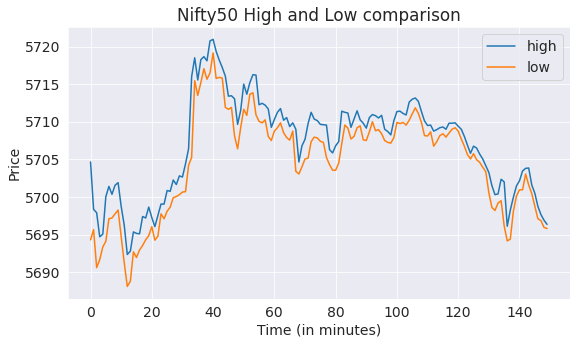

In [41]:
nifty50_dir_lite.high.plot()
nifty50_dir_lite.low.plot()

plt.xlabel("Time (in minutes)")
plt.ylabel("Price")

plt.title("Nifty50 High and Low comparison")
plt.legend(['high', 'low'])

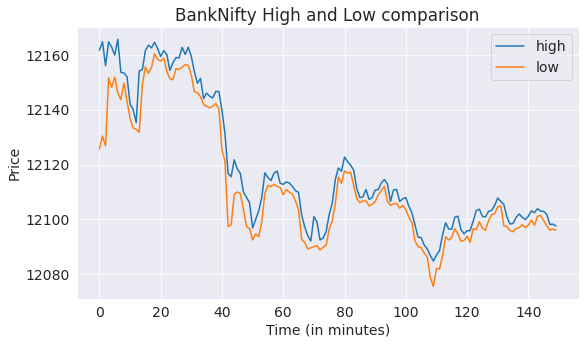

In [42]:
banknifty_dir_lite.high.plot()
banknifty_dir_lite.low.plot()

plt.xlabel("Time (in minutes)")
plt.ylabel("Price")

plt.title("BankNifty High and Low comparison")
plt.legend(['high', 'low'])

These plots indicate the range of these stocks.

# ---------------------------------------------------------------------------------------------------------------

#### Lets perform some relativistic analysis amongst nifty50 and banknifty

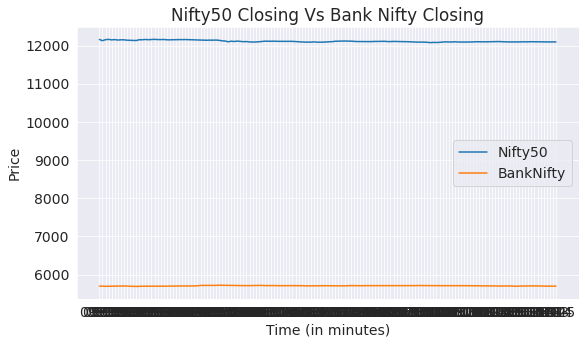

In [43]:
plt.plot( banknifty_dir_lite.time,  banknifty_dir_lite.close)
plt.plot( nifty50_dir_lite.time,  nifty50_dir_lite.close)

plt.xlabel("Time (in minutes)")
plt.ylabel("Price")

plt.title("Nifty50 Closing Vs Bank Nifty Closing")
plt.legend(['Nifty50', 'BankNifty'])

#### As you may see, we are getting simple straight lines as the Banknifty stock price in the range of 12000-12200 whereas the Nifty50 stock price lies in the range of 5600-5800. This big difference between the ranges makes it difficult to make relativistic anlalysis.

Now lets try comparing the ranges (range is a paramater I have chosen which indicates the difference between high and low in every minute between 9:15 to 11:30)

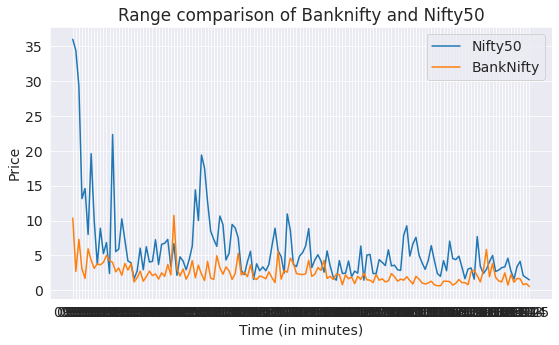

In [44]:
plt.title("Range comparison of Banknifty and Nifty50")

plt.plot( banknifty_dir_lite.time,  banknifty_dir_lite.range)
plt.plot( nifty50_dir_lite.time,  nifty50_dir_lite.range)

plt.xlabel("Time (in minutes)")
plt.ylabel("Price")

plt.legend(['Nifty50', 'BankNifty'])

#### This plot provides better relativistic insights as one can infer the banknifty stock range being larger. This indicates that bank nifty fluctuates more (per minute for this timeslot) than nifty50.

Let us save and upload our work to Jovian before continuing

In [45]:
import jovian

In [46]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "f20201673/analysing-stocks-in-nse-stock-exchange" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/f20201673/analysing-stocks-in-nse-stock-exchange


'https://jovian.ai/f20201673/analysing-stocks-in-nse-stock-exchange'

# ---------------------------------------------------------------------------------------------------------------

## Asking and Answering Questions





#### Q: At which times did the banknifty opened highest?

In [56]:
banknifty_dir.sort_values('open', ascending = False).head(5)

,index,date,time,open,high,low,close,range
236194,BANKNIFTY,20150128,12:36,20903.95,20903.95,20878.40,20878.40,25.55
236193,BANKNIFTY,20150128,12:35,20902.15,20907.55,20894.35,20907.55,13.20
236192,BANKNIFTY,20150128,12:34,20899.80,20905.70,20899.25,20905.05,6.45
236191,BANKNIFTY,20150128,12:33,20880.65,20904.30,20880.65,20904.30,23.65
236195,BANKNIFTY,20150128,12:37,20878.70,20878.70,20864.60,20865.80,14.10


#### Q:Similarly for nifty50 ?

In [57]:
nifty50_dir.sort_values('open', ascending = False).head(5)

,index,date,time,open,high,low,close,range
240137,NIFTY,20150304,09:16,9115.40,9119.20,9105.65,9106.50,13.55
240138,NIFTY,20150304,09:17,9104.55,9105.55,9094.90,9096.55,10.65
240139,NIFTY,20150304,09:18,9097.35,9097.35,9081.40,9090.55,15.95
240140,NIFTY,20150304,09:19,9090.85,9093.05,9086.10,9087.85,6.95
240141,NIFTY,20150304,09:20,9088.45,9089.15,9086.05,9088.10,3.10


#### Q: What was the highest high and lowest low for the day in both banknifty and nifty50?

#### Highest high for Banknifty: 

In [60]:
banknifty_dir.sort_values('high', ascending = False).head(1)

,index,date,time,open,high,low,close,range
236193,BANKNIFTY,20150128,12:35,20902.15,20907.55,20894.35,20907.55,13.2


##### Highest high for Nifty50 

In [61]:
nifty50_dir.sort_values('high', ascending = False).head(1)

,index,date,time,open,high,low,close,range
240137,NIFTY,20150304,09:16,9115.4,9119.2,9105.65,9106.5,13.55


##### Lowest low for BankNifty

In [63]:
lownifty = banknifty_dir.sort_values('low', ascending = False).tail(1)

In [64]:
lownifty

,index,date,time,open,high,low,close,range
252479,BANKNIFTY,20150624,15:19,1405.05,1407.05,1404.6,1406.25,2.45


##### Lowest low for Nifty50

In [65]:
nifty50_dir.sort_values('low', ascending = False).tail(1)

,index,date,time,open,high,low,close,range
13932,NIFTY,20130828,10:23,5126.35,5130.55,5118.85,5130.3,11.7


#### Q: At what times did the stocks witnessed highest fluctuations?

In [66]:
nifty50_dir.sort_values('range' ,ascending = False).head(5)

,index,date,time,open,high,low,close,range
158346,NIFTY,20140516,09:16,7273.55,7433.20,7264.40,7417.65,168.80
304170,NIFTY,20160120,09:16,7357.05,7470.90,7328.25,7329.30,142.65
162096,NIFTY,20140530,09:16,7256.00,7258.15,7118.45,7254.55,139.70
275867,NIFTY,20150929,11:01,7703.15,7800.20,7703.05,7798.55,97.15
159097,NIFTY,20140520,09:17,7288.75,7353.65,7281.45,7288.75,72.20


#### As the output indicates, the highest fluctuation or the difference between highs and lows was seen to be 168.80 in case of Nifty 50

#### Q: At what times did BankNifty witness highest fluctuations?

In [67]:
banknifty_dir.sort_values('range' ,ascending = False).head(5)

,index,date,time,open,high,low,close,range
318825,BANKNIFTY,20160120,09:16,15049.35,15533.45,14978.10,14980.90,555.35
172969,BANKNIFTY,20140516,09:16,14662.20,15115.00,14662.20,15111.75,452.80
290431,BANKNIFTY,20150929,11:01,16707.45,17104.40,16706.45,17097.90,397.95
173240,BANKNIFTY,20140516,13:47,14498.50,14758.65,14468.10,14758.65,290.55
105107,BANKNIFTY,20130920,11:02,11132.80,11132.80,10850.40,10850.40,282.40


#### Similarly for BankNifty the highest fluctuation was recorded to be 555.35

## The fact that market is highly volatile as soon as it opens the reason being previous working day's off market orders executions is simply proved correct by this particular analysis  

In [68]:
import jovian

In [69]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "f20201673/analysing-stocks-in-nse-stock-exchange" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/f20201673/analysing-stocks-in-nse-stock-exchange


'https://jovian.ai/f20201673/analysing-stocks-in-nse-stock-exchange'

## Inferences and Conclusion

Various conclusions can be made about the overall market trend throughout the day. We recorded some key values like highest-high, lowest-low, range, etc. Also we plotted some graphs which gave us a brief overview of uptrend/downtrend during a particular time slot. We also saw the fluctuations i.e the difference between the highs and lows of these stocks. An attempt to perform some basic technical analysis was made.

In [66]:
import jovian

In [67]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "f20201673/analysing-stocks-in-nse-stock-exchange" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/f20201673/analysing-stocks-in-nse-stock-exchange


'https://jovian.ai/f20201673/analysing-stocks-in-nse-stock-exchange'

## References and Future Work



The following are the links that I found helpful during the course of this data analysis using pandas project. 

- Stack Overflow Developer Survey: https://insights.stackoverflow.com/survey
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
- 'opendatasets' Python library: https://github.com/JovianML/opendatasets
- Technical analysis: https://www.moneycontrol.com/markets/technicals/?classic=true

 

### This particular project was based on my very basic knowledge about pandas and various features it has. In the future I aim to make such interesting projects more and more in-depth and the ones involving critical analysis and usage of various amazing functions. I would like to give special thanks to Aakash sir for providing such an interesting course that too for free. Even if it was paid, it had been worth every penny! It has developed a significant amount of interest in python and pandas. Thank you!

In [72]:
import jovian

In [73]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "f20201673/analysing-stocks-in-nse-stock-exchange" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/f20201673/analysing-stocks-in-nse-stock-exchange


'https://jovian.ai/f20201673/analysing-stocks-in-nse-stock-exchange'